In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import os

C:\Users\Krist\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def getStatistics(files):
    if files == 1:
        filesForProcessing = availableFiles[:]
        
    elif isinstance(files,list):
        filesForProcessing = files[:]
    else:
        print("Incorrect format - please specify either a list or '1'")
    
    for element in filesForProcessing:
        print("-----------------------------------------------------------------------------------------------")
        print("The file being processed is: %s" % element)
        
        with open(path + "/"+element,"r") as file:
            temp = file.readlines()

        tempClean = [re.sub("[\n ]","",i) for i in temp]

        if len(tempClean[0]) == 1:

            tempClean = [int(i) for i in tempClean]

            uniqueVals, counts = np.unique(tempClean,return_counts = True)# Perhaps should listOfObs be sorted?

            if len(uniqueVals) > 50:
                print("\nThere are more than 50 unique values, so a histogram over the values are shown.")
#                     answer = input("There are more than 50 unique values, do you want to see them? ")

#                     if (answer == 'yes') or (answer == 'Yes'):
#                         print("The unique values and their frequency count, presented as {unique Value: Count}, are:\n")
#                         print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")
                plt.hist(tempClean)
                plt.title("Distribution of the data")
                plt.show()
            else:
                print("\nThe unique values and their frequency count, presented as {unique Value: Count}, are:\n")
                print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")

        else:

            tempClean = [re.split(",",i) for i in tempClean]

            lenOfElements = len(tempClean[0])

            database = [[] for i in np.arange(lenOfElements)]

            # Dividing in the observations
            for observation in tempClean:
                for partial in enumerate(observation):

                    database[partial[0]].append(int(partial[1]))

            # Getting information on the content of each list in the database.
            print("\nThe file contains %i separate streams of values." % lenOfElements)
            for listOfObs in database:
                uniqueVals, counts = np.unique(listOfObs,return_counts = True)# Perhaps should listOfObs be sorted?

                if (all(counts == 1)):
                    answer = input("\nAll values of the variable currently being processed is equal to one, which indiates\
that the values are numberic of other values. Do you want to disregard the processing of these values? ")
                    if (answer == 'no') or (answer == 'No'):
                        print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")

                else:
                    if len(uniqueVals) > 50:
#                             answer = input("There are more than 50 unique values, do you want to see them? ")

#                             if (answer == 'yes') or (answer == 'Yes'):
#                                 print("The unique values and their frequency count, presented as {unique Value: Count}, are:\n")
#                                 print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")
                        print("\nThere are more than 50 unique values, so a histogram over the values are shown.")
                        plt.hist(listOfObs)
                        plt.title("Distribution of the data")
                        plt.show()
                    else:
                        print("\nThe unique values and their frequency count, presented as {unique Value: Count}, are:\n")
                        print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")

In [3]:
availableFolders = {}
folderCount = 0

for element in os.listdir("../../Exported_Data"):#os.listdir("../Assets/Exported_Data"):
    if ("txt" not in element) and ("meta" not in element):
        availableFolders[folderCount] = element
        folderCount += 1
        

In [4]:
print("The available folders, containing the data of interest, are:")
availableFolders

The available folders, containing the data of interest, are:


{0: 'BaseEnvironmentNoCurriculum',
 1: 'BaseEnvironmentNoCurriculum-1.1-0',
 2: 'BaseEnvironmentNoCurriculum-1.1.1-0',
 3: 'BaseEnvironmentNoCurriculum-1.2-0',
 4: 'CcCLStaticDynamic-1.8',
 5: 'CLStaticDynamicObstacles-1.0',
 6: 'CLStaticDynamicObstacles-1.0.1',
 7: 'CLStaticDynamicObstacles-1.0.2',
 8: 'CLStaticDynamicObstacles-1.0.3',
 9: 'CLStaticDynamicObstacles-1.0.4',
 10: 'CLStaticDynamicObstacles-1.1',
 11: 'CLStaticDynamicObstacles-1.2',
 12: 'CLStaticDynamicObstacles-1.3',
 13: 'CLStaticDynamicObstacles-1.4',
 14: 'CLStaticDynamicObstacles-1.5',
 15: 'CLStaticDynamicObstacles-1.6',
 16: 'CLStaticDynamicObstacles-1.7',
 17: 'CLStaticDynamicObstacles-1.8',
 18: 'CLStaticDynamicVS3',
 19: 'CLStaticDynamicVS6',
 20: 'CLStaticDynamicVS6-1',
 21: 'CurriculumLearning',
 22: 'FullSetUpCertain-1.0',
 23: 'FullSetUpCertain-1.1',
 24: 'RewardShaping-1.0',
 25: 'RewardShaping-1.1',
 26: 'RewardShaping-1.2',
 27: 'VisualAgent-1.2',
 28: 'VisualAgent-1.3',
 29: 'VisualAgent-1.4',
 30: 'Vis

In [5]:
path = "../../Exported_Data/"+availableFolders[23]# <- Choose the folders from above

In [6]:
os.listdir(path)

['Area_Env4_2-0_pedCount.txt',
 'Area_Env4_2-0_stepsCA.txt',
 'Area_Env4_2-0_stepsToGoal.txt',
 'Area_Env4_2-1_pedCount.txt',
 'Area_Env4_2-1_stepsCA.txt',
 'Area_Env4_2-1_stepsToGoal.txt',
 'Area_Env4_2-2_pedCount.txt',
 'Area_Env4_2-2_stepsCA.txt',
 'Area_Env4_2-2_stepsToGoal.txt',
 'Area_Env4_2-3_pedCount.txt',
 'Area_Env4_2-3_stepsCA.txt',
 'Area_Env4_2-3_stepsToGoal.txt']

In [9]:
files = np.unique([re.split("_", file)[-1] for file in np.array(os.listdir(path))])

In [10]:
files

array(['pedCount.txt', 'stepsCA.txt', 'stepsToGoal.txt'], dtype='<U15')

In [58]:
# fT = [[] for file in files]
fT = []
for j,fileType in enumerate(files):
    
    if j == 0:
        print("First layer of the variable contains: \n\n", files)
    
    FoI = [file for file in os.listdir(path) if fileType in file]
    
#     CFoI = [[] for file in FoI]
    CFoI = []
    
    for i,individualFile in enumerate(FoI):
        
        if (i == 0) and (j == 0):
            print("\nSecond layer of the variable contains: \n\n", FoI)
        
        with open(path+"/"+individualFile,"r") as file:
            content = file.readlines()
        
        cleanFirst = re.split(",",re.sub("[\n ]","",content[0]))

        hold = [[] for numbObs in np.arange(len(cleanFirst))]

        for l,obs in enumerate(content):
            if (i == 0) and (j == 0) and (l == 0):
                print("\n\nThe third layer contains individual data streams for a given file type.")
            c = re.split(",",re.sub("[\n ]","",obs))
            
            [hold[o].append(int(c[o])) for o in np.arange(len(c))]
#         print(len(hold))
#     print(len(CFoI))
        CFoI.append(hold)
    fT.append(CFoI)            

First layer of the variable contains: 

 ['pedCount.txt' 'stepsCA.txt' 'stepsToGoal.txt']

Second layer of the variable contains: 

 ['Area_Env4_2-0_pedCount.txt', 'Area_Env4_2-1_pedCount.txt', 'Area_Env4_2-2_pedCount.txt', 'Area_Env4_2-3_pedCount.txt']


The third layer contains individual data streams for a given file type.


13656
13437
14057
13347


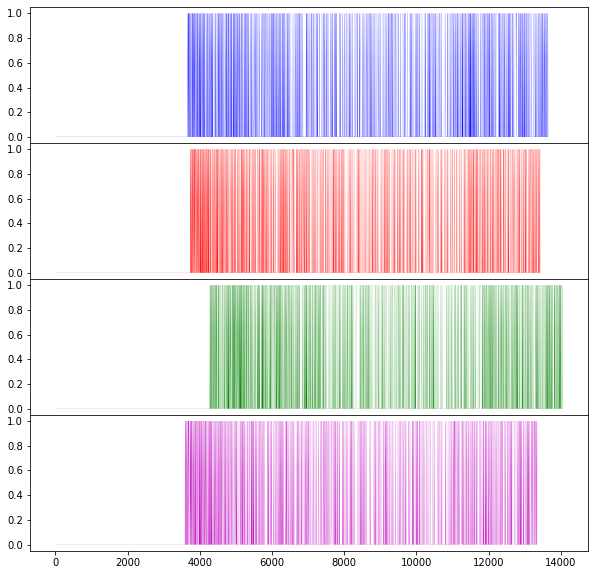

In [84]:
fig,(ax,bx,cx,dx) = plt.subplots(4,1,figsize=(10,10),sharex=True,gridspec_kw = {'wspace':0, 'hspace':0})

plots = [ax,bx,cx,dx]
colors = ['b','r','g','m']
for ele,pt,c in zip(fT[0],plots,colors):
#     print(len(ele[0]))
    pt.plot(ele[0],linewidth=0.1,c=c)

In [154]:
hej = []
for ft in fT[0]:
    ma = 125
    startInt = 0
    sC = []
    
    maRange = np.arange(ma, len(ft[0]))
    
    for maObs in maRange:
        
        vals, freq =  np.unique(np.array(ft[0])[startInt:maObs],return_counts = True)

        if len(freq) > 1:
            sC.append(freq[1]/sum(freq))
        else:
            sC.append(0)
        startInt += 1
    hej.append(sC)

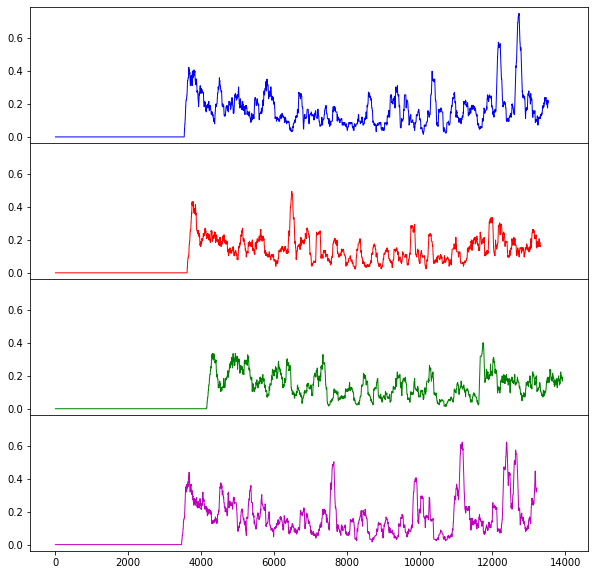

In [155]:
fig,(ax,bx,cx,dx) = plt.subplots(4,1,figsize=(10,10),sharex=True,sharey=True,
                                 gridspec_kw = {'wspace':0, 'hspace':0})

plots = [ax,bx,cx,dx]
colors = ['b','r','g','m']
for ele,pt,c in zip(hej,plots,colors):
#     print(len(ele[0]))
    pt.plot(ele,linewidth=1,c=c)